# Info

Временные ряды – важная разновидность структурированных данных. Они встречаются во многих областях, 
в том числе в финансах, экономике, экологии, нейронауках и физике. Любые результаты наблюдений 
или измерений в разные моменты времени образуют временной ряд. Для многих временных рядов 
характерна фиксированная частота, т. е. интервалы между соседними точками одинаковы – измерения 
производятся, например, один раз в 15 секунд, 5 минут или в месяц. Но временные ряды могут быть 
и нерегулярными, когда интервалы времени между соседними точками различаются. 
Как разметить временной ряд и обращаться к нему, зависит от приложения. 

Существуют следующие варианты:
- временные метки, конкретные моменты времени;
- фиксированные периоды, например январь 2007 года или весь 2010 год;
- временные интервалы, обозначаемые метками начала и конца; 
  периоды можно считать частными случаями интервалов;
- время эксперимента или истекшее время; каждая временная метка измеряет время, 
прошедшее с некоторого начального момента. Например, результаты измерения диаметра 
печенья с момента помещения теста в духовку.

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Чтение данных

Источник: Федеральный резервный банк Сент-Луиса. 

Публикация: Спреды процентных ставок.

Единицы: проценты, без сезонной поправки. 

Частота: Ежедневно.
Начиная с обновления от 21 июня 2019 года, данные по казначейским облигациям, используемые при 
расчете спредов процентных ставок, получаются непосредственно из Министерства финансов США. 
Серия рассчитывается как разница между 10-летними казначейскими облигациями с постоянным сроком 
погашения (BC_10YEAR) и 2-летними казначейскими облигациями с постоянным сроком погашения (BC_2YEAR). 
Обе основные серии публикуются Министерством финансов США.

In [2]:
df = pd.read_csv("T10Y2Y.csv", names=["date", "rate"], header=0, parse_dates=["date"])
df.head()

,date,rate
0,2019-02-04,0.2
1,2019-02-05,0.18
2,2019-02-06,0.18
3,2019-02-07,0.17
4,2019-02-08,0.18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1305 non-null   datetime64[ns]
 1   rate    1305 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 20.5+ KB


На последнем выводе видно, что столбец `rate` прочитался текст, а не как число.
Посмотрим почему

In [4]:
df

,date,rate
0,2019-02-04,0.2
1,2019-02-05,0.18
2,2019-02-06,0.18
3,2019-02-07,0.17
4,2019-02-08,0.18
...,...,...
1300,2024-01-29,-0.21
1301,2024-01-30,-0.3
1302,2024-01-31,-0.28
1303,2024-02-01,-0.33


Видим, что в некоторых строках `rate` вместо какого-либо значения, стоит просто точка "." 

In [5]:
df[df["rate"] == "."]

,date,rate
10,2019-02-18,.
54,2019-04-19,.
80,2019-05-27,.
108,2019-07-04,.
150,2019-09-02,.
180,2019-10-14,.
200,2019-11-11,.
213,2019-11-28,.
232,2019-12-25,.
237,2020-01-01,.


Принудительно преобразуем столбец `rate` в число. Параметр `errors="coerce"` 
прообразует неверные значения в NaN

In [6]:
df["rate"] = pd.to_numeric(df["rate"], errors="coerce")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1305 non-null   datetime64[ns]
 1   rate    1252 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.5 KB


Видим что теперь все в порядке. 
Заменим значения NaN в столбце `rate` на результаты предыдущего наблюдения.

In [8]:
df["rate"].ffill(inplace=True)

Выведем график

<Axes: xlabel='date', ylabel='rate'>

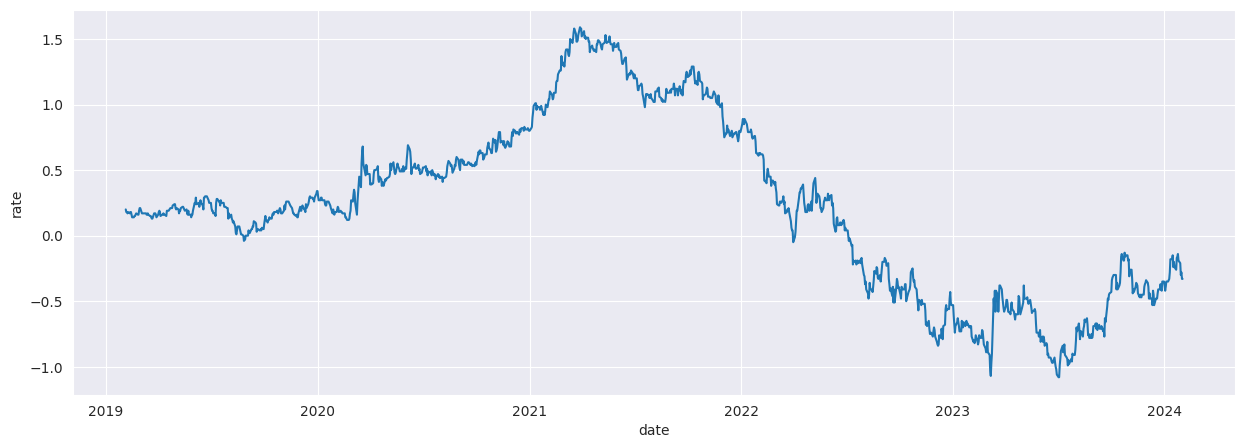

In [9]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x="date", y="rate")

# plt.plot(df["date"], df["rate"], color="green")
# plt.plot(df["date"], df["mean_rate_10"], color="red")

К сожалению, на графике не просматривается какая-либо сезонность и не угадывается какой-либо 
закон изменения величины. Но это мной не угадывается, возможно модели справятся лучше.

# Darts

Преобразуем наш датасет в тайм-серию фреймворка Darts

In [10]:
from darts import TimeSeries

series = TimeSeries.from_dataframe(df, time_col='date', value_cols=["rate"])

Еще раз убедимся в очевидном - сезонность в наших данных отсутствует, 
но сделаем это методами Darts. 

In [11]:
from darts.utils.statistics import check_seasonality

for m in range(2, 365):
    is_seasonal, period = check_seasonality(series, m=m, max_lag=365, alpha=0.05)
    if is_seasonal:
        print(f"There is seasonality of order {period}.")

Посмотрим какая у нас последняя дата в таймсерии. 
Разделим серию на обучающую и тестовую части. 
Для тестов оставим последний месяц.

In [12]:
df.tail(1)

,date,rate
1304,2024-02-02,-0.33


In [13]:
from pandas.tseries.offsets import Day

train, test = series.split_before(pd.Timestamp("2024-02-02") - 30 * Day())

Darts имеет реализацию многих моделей предсказания.
Используем одну из них - LightGBM.

Параметр `lags=180` означает, что модель при предсказании будет опираться на последние 180 наблюдений,
а `output_chunk_length=30` означает, что за один раз модель будет давать прогноз на 30 периодов (дней)

In [14]:
from darts.models import LightGBMModel

model = LightGBMModel(
    lags=180,
    output_chunk_length=30,
    verbose=-1
)

Importing plotly failed. Interactive plots will not work.


Тренируем модель на обучающей части таймсерии.

In [15]:
model.fit(train)

LightGBMModel(lags=180, lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=30, add_encoders=None, likelihood=None, quantiles=None, random_state=None, multi_models=True, use_static_covariates=True, categorical_past_covariates=None, categorical_future_covariates=None, categorical_static_covariates=None, verbose=-1)

Сделаем предсказание на 1 месяц и выведем график реальных данных и предсказанных моделью.
(синяя линия в конце графика)

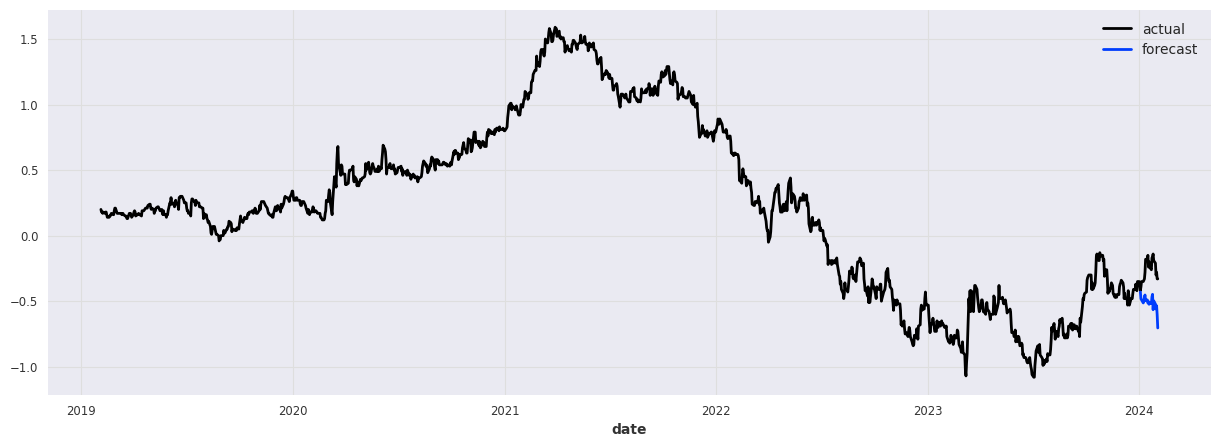

In [16]:
prediction = model.predict(len(test))

plt.figure(figsize=(15,5))
series.plot(label='actual')
prediction.plot(label='forecast')
plt.legend()

Посмотрим на метрику MAPE - среднюю абсолютную процентную ошибку. 

In [17]:
from darts.metrics import mape

print(f"MAPE: {mape(test, prediction):.2f}%")

MAPE: 116.44%


Я бы сказал, что предсказание слишком далеко от реальных значений показателя.
Вместе с тем, помним, что периодичности в имеющихся данных нет. 
Поэтому модели сложно построить достоверный прогноз. 

Попробуем подать для тренировки модели не ежедневные наблюдения, а усредненные, 
допустим на месячном интервале.

In [18]:
df["mean_rate_30"] = df["rate"].rolling(30, min_periods=10).mean()

series = TimeSeries.from_dataframe(df, time_col='date', value_cols=["mean_rate_30"], fillna_value=0)
train, test = series.split_before(pd.Timestamp("2024-02-02") - 30 * Day())

# Параметры модели не меняем, сразу тренируем
model.fit(train)

LightGBMModel(lags=180, lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=30, add_encoders=None, likelihood=None, quantiles=None, random_state=None, multi_models=True, use_static_covariates=True, categorical_past_covariates=None, categorical_future_covariates=None, categorical_static_covariates=None, verbose=-1)

Делаем прогноз на месяц и выводим графики

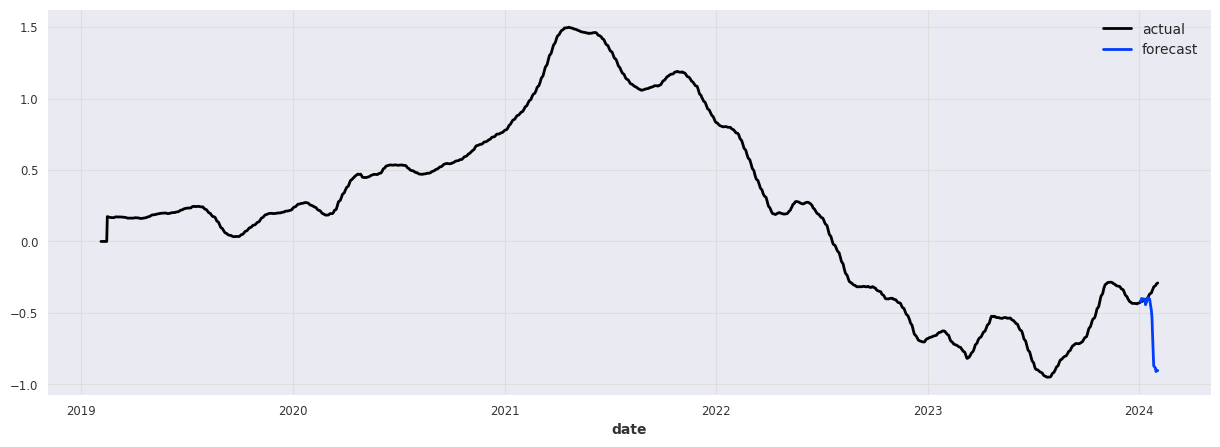

In [19]:
prediction = model.predict(len(test))

plt.figure(figsize=(15,5))
series.plot(label='actual')
prediction.plot(label='forecast')
plt.legend()

In [20]:
print(f"MAPE: {mape(test, prediction):.2f}%")

MAPE: 67.08%


Усреднение данных ничего не дало. Прогноз не точен. Необходимо менять параметры модели.

На графике видно, что значение наблюдаемой величины за весь период наблюдений менялось 
в широком диапазоне и бессистемно. Поэтому, едва ли это была удачная идея - опираться 
при прогнозе на 180 дней и делать его сразу на месяц вперед.

Пусть теперь наша модель опирается на данные предыдущих 30 дней 
и за раз предсказывает не дальше, чем на 3 дня.

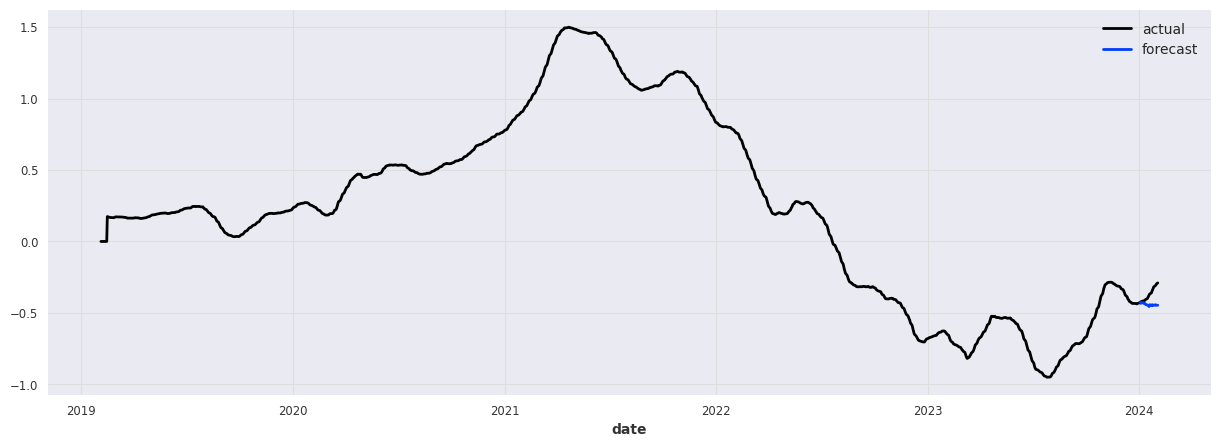

In [21]:
model = LightGBMModel(
    lags=30,
    output_chunk_length=3,
    verbose=-1
)

model.fit(train)
prediction = model.predict(len(test))

plt.figure(figsize=(15,5))
series.plot(label='actual')
prediction.plot(label='forecast')
plt.legend()

In [22]:
print(f"MAPE: {mape(test, prediction):.2f}%")

MAPE: 22.67%


На графике и по метрике видно, что предсказанные значения стали гораздо ближе к фактическим.
Модель стала точнее.

Попробуем еще несколько моделей, которые предоставляет Darts.
Рассчитаем метрику MAPE для них.

In [23]:
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta

models = [ExponentialSmoothing(), TBATS(), AutoARIMA(), Theta()]

for model in models:
    model.fit(train)
    forecast = model.predict(len(test))
    print(f"model {model} obtains MAPE: {mape(actual_series=test, pred_series=forecast):.2f}%")

model ExponentialSmoothing() obtains MAPE: 13.36%
model TBATS() obtains MAPE: 15.21%
model AutoARIMA() obtains MAPE: 13.13%
model Theta() obtains MAPE: 20.08%


# Prophet

Prophet для работы требует датафрейм из двух колонок с названиями `ds` и `y`.
Создадим ему такой, но обрежем данные за последний месяц чтобы не подглядывал :)

In [24]:
wo_30_days = df.shape[0]-30
df_ = df.loc[:wo_30_days, ["date", "rate"]].rename({"date":"ds", "rate":"y"}, axis=1)

Создаем модель и тренируем на наших данных

In [25]:
from prophet import Prophet

model = Prophet()
model.fit(df_)

02:02:10 - cmdstanpy - INFO - Chain [1] start processing
02:02:10 - cmdstanpy - INFO - Chain [1] done processing


Prophet работает по немного необычной схеме.

Сначала ему нужно создать таблицу с одной лишь колонкой. 
Это даты для которых он будет делать прогноз. 

In [26]:
future = model.make_future_dataframe(periods=30)
future.tail()

,ds
1301,2024-01-20
1302,2024-01-21
1303,2024-01-22
1304,2024-01-23
1305,2024-01-24


Я обратил внимание, что даты для прогнозирования в этой таблице заканчиваются на неделю раньше, 
чем в оригинальной.

In [27]:
df.tail()

,date,rate,mean_rate_30
1300,2024-01-29,-0.21,-0.309333
1301,2024-01-30,-0.30,-0.303333
1302,2024-01-31,-0.28,-0.296667
1303,2024-02-01,-0.33,-0.293000
1304,2024-02-02,-0.33,-0.290333


Думаю тут дело в том, что оригинальная таблица имела пропуски на выходных днях.
А в таблице, которую создал Prophet все даты подряд.
Но для нашей задачи это не существенно.

Далее делается прогноз. Для этого создается новая таблица в которую записывается дата 
из предыдущей таблицы, прогноз в столбец `yhat` и куча другой статистической информации.

In [28]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-02-04,0.161531,-0.008682,0.269845,0.161531,0.161531,-0.029360,-0.029360,-0.029360,-0.005827,-0.005827,-0.005827,-0.023533,-0.023533,-0.023533,0.0,0.0,0.0,0.132171
1,2019-02-05,0.161639,-0.020117,0.267942,0.161639,0.161639,-0.031933,-0.031933,-0.031933,-0.006246,-0.006246,-0.006246,-0.025688,-0.025688,-0.025688,0.0,0.0,0.0,0.129706
2,2019-02-06,0.161747,-0.011855,0.275507,0.161747,0.161747,-0.035136,-0.035136,-0.035136,-0.007271,-0.007271,-0.007271,-0.027865,-0.027865,-0.027865,0.0,0.0,0.0,0.126612
3,2019-02-07,0.161855,-0.023226,0.270326,0.161855,0.161855,-0.036884,-0.036884,-0.036884,-0.006807,-0.006807,-0.006807,-0.030077,-0.030077,-0.030077,0.0,0.0,0.0,0.124971
4,2019-02-08,0.161963,-0.029890,0.261329,0.161963,0.161963,-0.042172,-0.042172,-0.042172,-0.009841,-0.009841,-0.009841,-0.032331,-0.032331,-0.032331,0.0,0.0,0.0,0.119791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,2024-01-20,-0.466194,-0.563882,-0.277816,-0.469679,-0.463047,0.038382,0.038382,0.038382,0.017996,0.017996,0.017996,0.020387,0.020387,0.020387,0.0,0.0,0.0,-0.427812
1302,2024-01-21,-0.465480,-0.568983,-0.291476,-0.469723,-0.462066,0.034406,0.034406,0.034406,0.017996,0.017996,0.017996,0.016410,0.016410,0.016410,0.0,0.0,0.0,-0.431075
1303,2024-01-22,-0.464766,-0.598586,-0.317352,-0.469724,-0.460660,0.006748,0.006748,0.006748,-0.005827,-0.005827,-0.005827,0.012575,0.012575,0.012575,0.0,0.0,0.0,-0.458019
1304,2024-01-23,-0.464052,-0.596154,-0.312076,-0.469543,-0.459504,0.002657,0.002657,0.002657,-0.006246,-0.006246,-0.006246,0.008902,0.008902,0.008902,0.0,0.0,0.0,-0.461396


Я так и не понял для чего Prophet делает и вносит в новую таблицу прогнозы на весь период дат, 
включая те даты, где есть фактические данные на которых он учился. 

/home/serhii/PycharmProjects/hillel/ML/hillel_ml_learning_project/.venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/serhii/PycharmProjects/hillel/ML/hillel_ml_learning_project/.venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


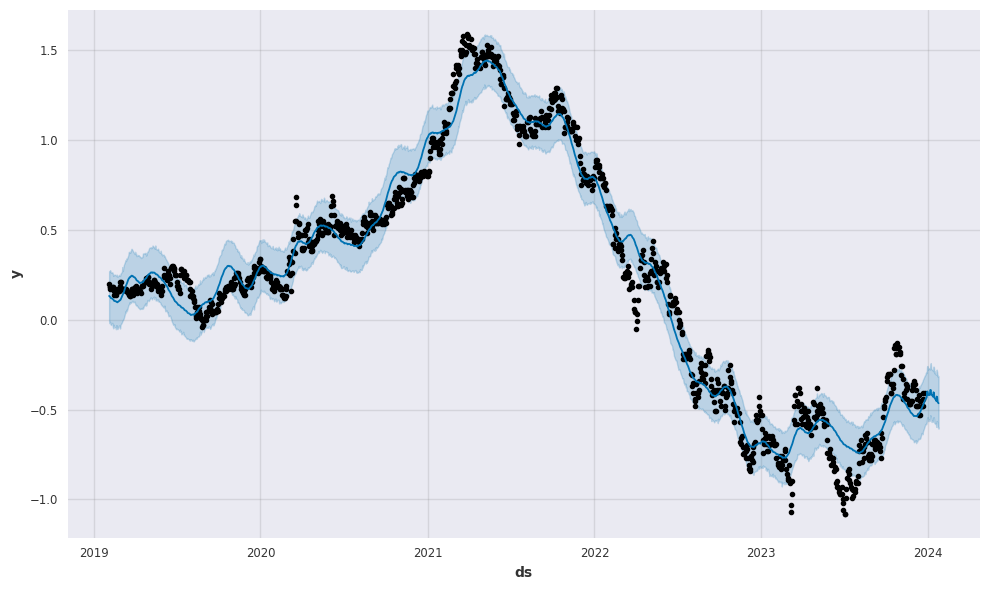

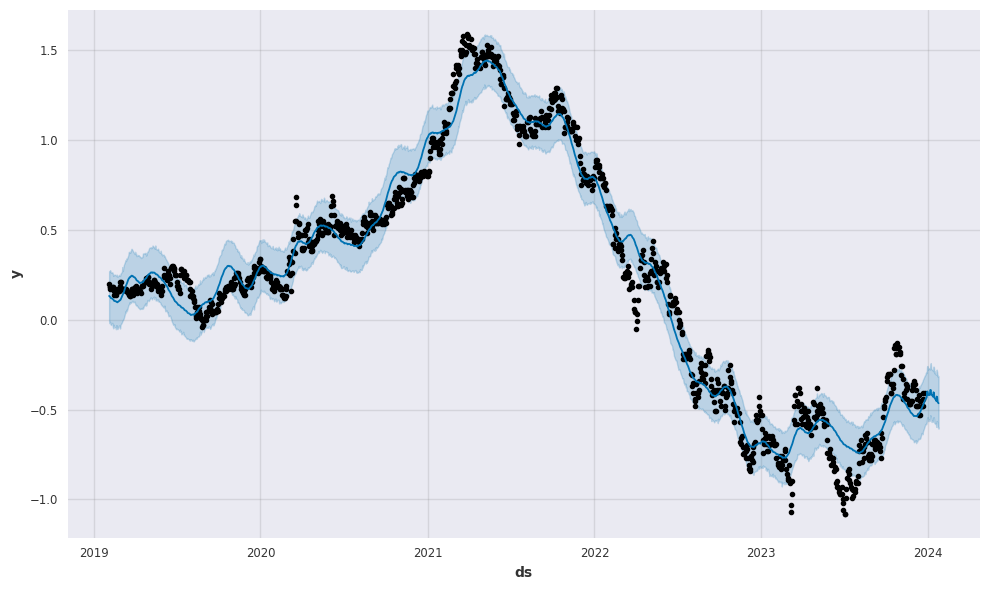

In [29]:
model.plot(forecast)

Я не понял, почему Prophet нарисовал два одинаковых графика, возможно глюк. 
Также я не берусь комментировать сами графики, т.к. пока в них не разобрался. 
Но это не мешает мне построить свои графики.

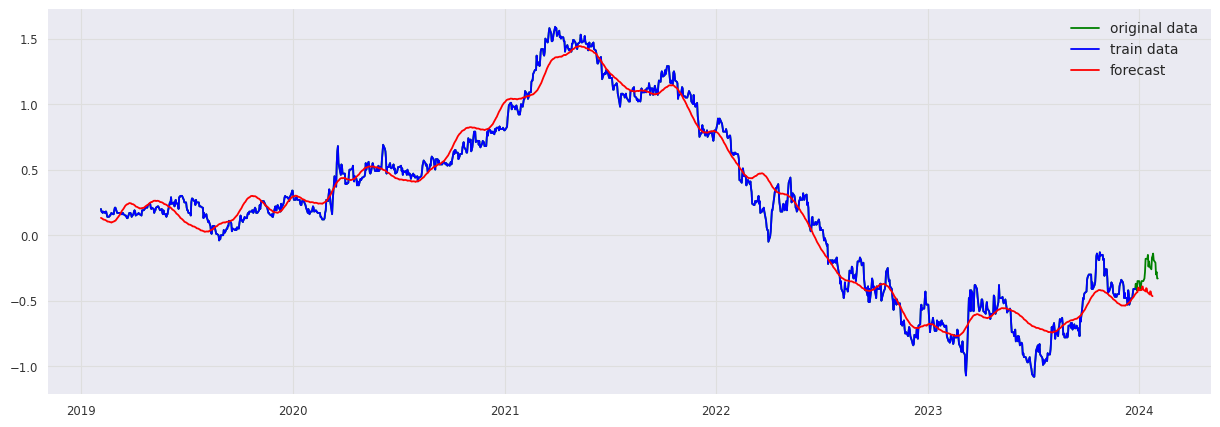

In [30]:
plt.figure(figsize=(15,5))
plt.plot(df["date"], df["rate"], color = 'green', label="original data")
plt.plot(df_["ds"], df_["y"], color = 'blue', label="train data")
plt.plot(forecast["ds"], forecast["yhat"], color='red', label='forecast')
plt.legend()

Как мы помним, мы спрятали от модели последний месяц данных и предложили ей самой эти данные предсказать.
На графике зеленым показан этот последний месяц оригинальных спрятанных данных.
Синяя линия - это те данные, которые мы показали модели, она на них тренировалась.
Красная - значения, предсказанные моделью.

Как мы видим, красный хвостик в конце абсолютно также разошелся с фактическими данными, 
как и на тех графиках, которые мы строили по результатам предсказания с помощью Darts.

Теперь усложним задачу - попросим модель предсказать не 30, а 90 дней.

02:02:12 - cmdstanpy - INFO - Chain [1] start processing
02:02:12 - cmdstanpy - INFO - Chain [1] done processing


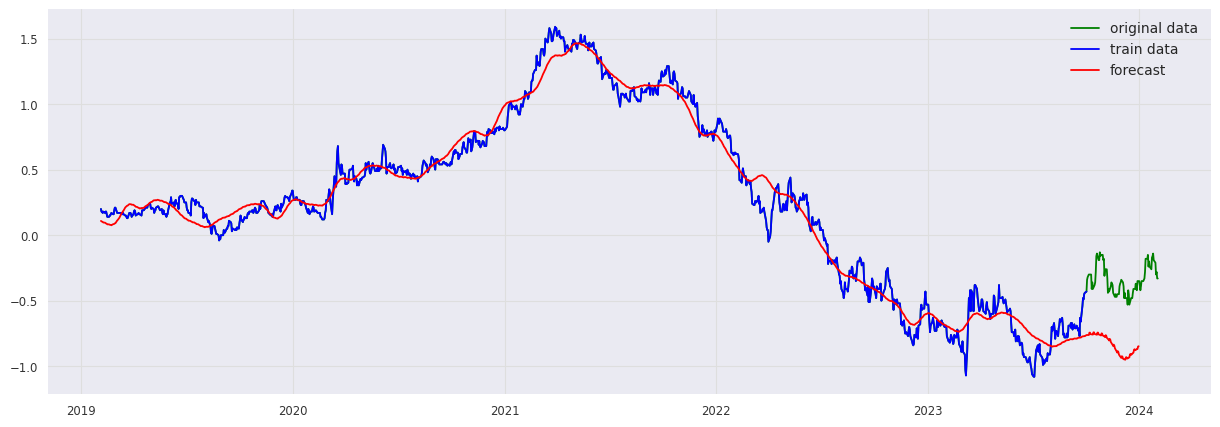

In [31]:
wo_90_days = df.shape[0]-90
df_ = df.loc[:wo_90_days, ["date", "rate"]].rename({"date":"ds", "rate":"y"}, axis=1)

model = Prophet()
model.fit(df_)

future = model.make_future_dataframe(periods=90)

forecast = model.predict(future)

plt.figure(figsize=(15,5))
plt.plot(df["date"], df["rate"], color = 'green', label="original data")
plt.plot(df_["ds"], df_["y"], color = 'blue', label="train data")
plt.plot(forecast["ds"], forecast["yhat"], color='red', label='forecast')
plt.legend()

Как несложно заметить, прогноз разошелся с фактическими данными еще больше, что неудивительно.

# Вывод

Наши данные не имеют никакой периодичности и системности. Чисто на основе одних лишь данных, 
не обладая дополнительной экономической информацией, совершенно невозможно построить
долгосрочный прогноз. Чем дальше в будущее мы пытаемся заглянуть, тем больше неточным
получается прогноз.  